# Table of Contents
 <p>

In [22]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown, Latex
import sys 
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed


%matplotlib inline

In [72]:
def get_file(aro, how, what, var):
    #cesta = './SSU_RI/will/outputs_f30/198301_200512/AR'
    cesta = './198301_200512/AR'
    infile = cesta+str(aro)+'/'+how+'/'+var+'_'+what+'_test_198301_200512_4will_stat_outputs.nc'
    print(infile)
    ds = xr.open_dataset(infile)
    #print(ds)
    return ds#.error_bar_t.sel(mi = 0)#.reset_coords(drop = True).values, ds.lev.values

def plotting(perc, quant):
    print(quant+' plotting')
    plot_kwargs = dict(lw = 2, marker = 'o')

    if quant in ['dwt']:
        xfp = xr.plot.FacetGrid(perc.sel(mi = 'ann'), col = 'hli') # row = 'mi', 
        xfp.map(plt.plot, 'dwt', 'lev', **plot_kwargs)                    
    else:
        xfp = xr.plot.FacetGrid(perc.sel(mi = 'ann'), col = 'var') # row = 'mi', 
        xfp.map(plt.plot, 'sigma', 'lev', **plot_kwargs)

    for axi, ax in enumerate(xfp.axes.flat):
        ax.set_ylim(100,1)
        ax.set_yscale('log')
        if quant in ['dwt']:
            ax.vlines(2, ymin=0, ymax=100, linestyle = ':', color ='k')
            ax.set_xlim(1,2.25)
        else:
            ax.vlines(0, ymin=0, ymax=100, linestyle = ':', color ='k')
            ax.set_xlim(-10,40)

def sigma_like(aro, what, quant):
    var = 't'
    how = 'w_hli'
    ds = get_file(aro, how, what, var)
    sigma = (ds[quant].sel(lim = 1) - ds[quant].sel(lim = 0))/2.
    ds_sigma = sigma.to_dataset(name = 'sigma')

    print()

    how = 'wo_hli'
    ds = get_file(aro, how, what, var)
    sigma = (ds[quant].sel(lim = 1) - ds[quant].sel(lim = 0))/2.
    ds_sigma_wo = sigma.to_dataset(name = 'sigma')

    perc= (ds_sigma_wo-ds_sigma)/ds_sigma_wo*100.
    #perc= (ds_sigma-ds_sigma_wo)/ds_sigma*100.
    perc['var'] = ['solar', 'trend', 'enso', 'saod', 'qbo1', 'qbo2']
    perc['mi'] = ['ann', 'DJF', 'MAM', 'JJA', 'SON']
    
    plotting(perc, quant)
    
def R2_like(aro, what, quant):
    var = 't'
    how = 'w_hli'
    ds = get_file(aro, how, what, var)
    how = 'wo_hli'
    ds2= get_file(aro, how, what, var)
    perc = xr.concat([ds[quant],ds2[quant]], dim = 'hli')
    perc['hli'] = ['w_hli', how]
    perc['mi'] = ['ann', 'DJF', 'MAM', 'JJA', 'SON']
    perc = perc.to_dataset(name = quant)
    #print(perc.sel(mi = 'ann'))
    plotting(perc, quant)
                            
    
    #print(perc)

        
    #plt.savefig(what+'_sigma_comparison_percentage_plot_AR'+str(aro)+'.pdf', bbox_inches = 'tight')

./198301_200512/AR2/w_hli/t_ssu_test_198301_200512_4will_stat_outputs.nc
()
./198301_200512/AR2/wo_hli/t_ssu_test_198301_200512_4will_stat_outputs.nc
error_bar_t plotting


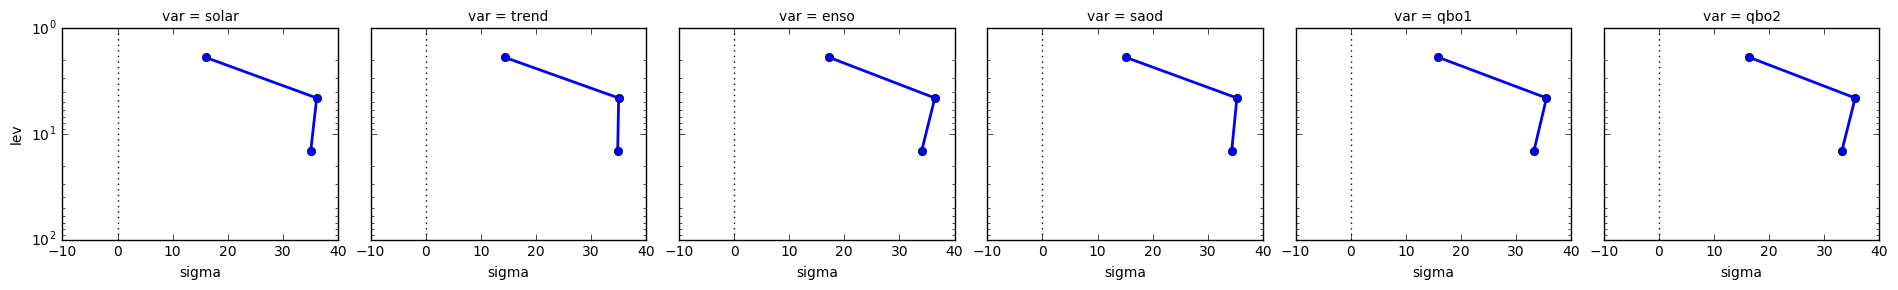

In [73]:
interact(sigma_like, aro=(0,3,1), what=('ssu','jra55','socol','merra2','m_iau'), quant=('error_bar_t'))

./198301_200512/AR2/w_hli/t_ssu_test_198301_200512_4will_stat_outputs.nc
./198301_200512/AR2/wo_hli/t_ssu_test_198301_200512_4will_stat_outputs.nc
dwt plotting


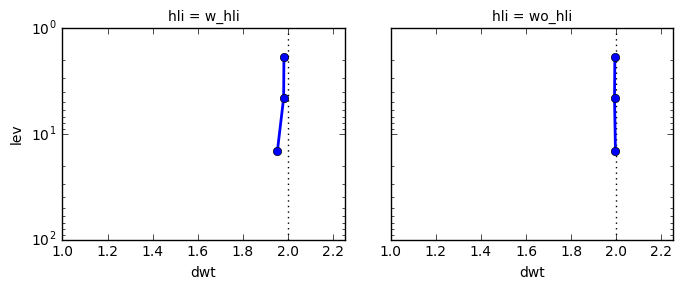

In [70]:
interact(R2_like, aro=(0,3,1), what=('ssu','jra55','socol','merra2','m_iau'), quant=('dwt'))

In [74]:
from ipywidgets import StaticInteract, RangeWidget, RadioWidget

StaticInteract(R2_like, aro=(0,3,1), what=('ssu','jra55','socol','merra2','m_iau'), quant=('dwt'))

ImportError: cannot import name StaticInteract